Epoch: 0 	 Discriminator Loss: 0.4426307678222656 		 Generator Loss: 2.0236170291900635


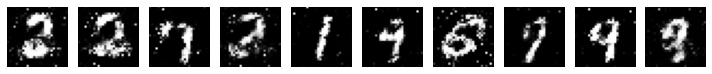

Epoch: 1 	 Discriminator Loss: 0.6636002659797668 		 Generator Loss: 1.4366765022277832


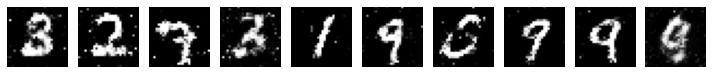

Epoch: 2 	 Discriminator Loss: 0.5079079866409302 		 Generator Loss: 1.6726343631744385


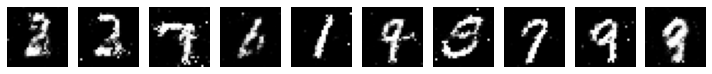

Epoch: 3 	 Discriminator Loss: 0.6652414798736572 		 Generator Loss: 1.720203161239624


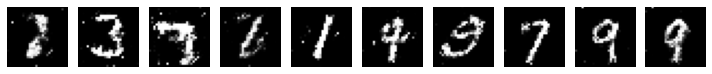

Epoch: 4 	 Discriminator Loss: 0.5440167188644409 		 Generator Loss: 1.3859405517578125


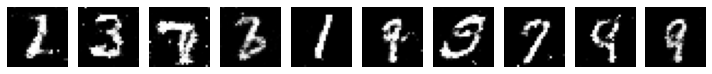

Epoch: 5 	 Discriminator Loss: 0.6352689862251282 		 Generator Loss: 1.5232127904891968


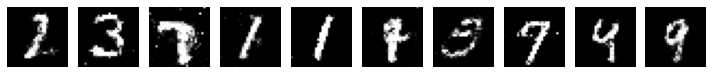

Epoch: 6 	 Discriminator Loss: 0.5317282676696777 		 Generator Loss: 1.4518102407455444


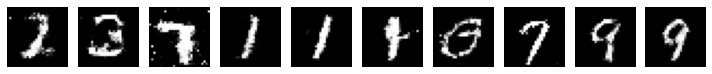

Epoch: 7 	 Discriminator Loss: 0.5351200103759766 		 Generator Loss: 1.43805730342865


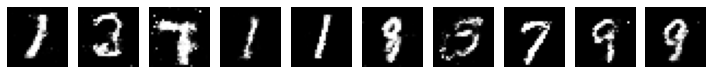

Epoch: 8 	 Discriminator Loss: 0.6445667147636414 		 Generator Loss: 1.3530455827713013


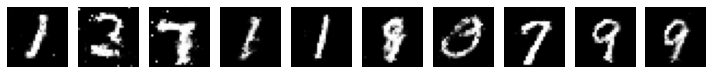

Epoch: 9 	 Discriminator Loss: 0.5500435829162598 		 Generator Loss: 1.3202283382415771


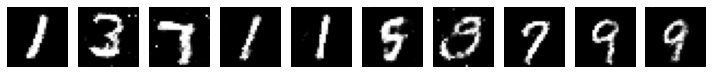

Epoch: 10 	 Discriminator Loss: 0.5599392652511597 		 Generator Loss: 1.5139951705932617


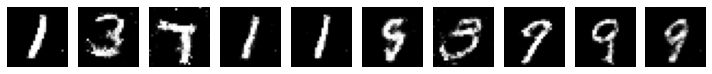

Epoch: 11 	 Discriminator Loss: 0.6890109777450562 		 Generator Loss: 1.6646766662597656


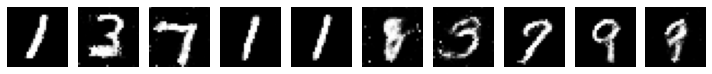

Epoch: 12 	 Discriminator Loss: 0.6308820247650146 		 Generator Loss: 1.3875391483306885


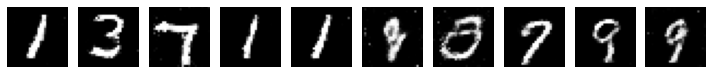

Epoch: 13 	 Discriminator Loss: 0.5509746074676514 		 Generator Loss: 1.4588689804077148


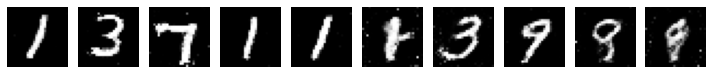

Epoch: 14 	 Discriminator Loss: 0.615397572517395 		 Generator Loss: 1.3699694871902466


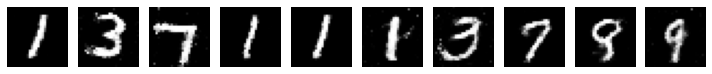

Epoch: 15 	 Discriminator Loss: 0.6519400477409363 		 Generator Loss: 1.3342249393463135


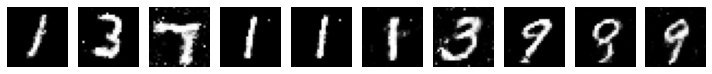

Epoch: 16 	 Discriminator Loss: 0.7515190839767456 		 Generator Loss: 1.455188512802124


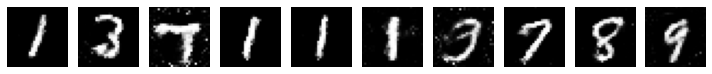

Epoch: 17 	 Discriminator Loss: 0.5819637775421143 		 Generator Loss: 1.571396827697754


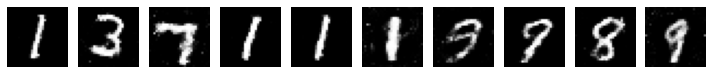

Epoch: 18 	 Discriminator Loss: 0.5797992944717407 		 Generator Loss: 1.60740065574646


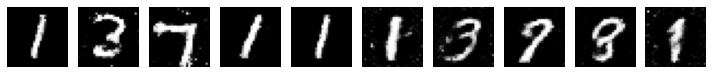

Epoch: 19 	 Discriminator Loss: 0.5747852325439453 		 Generator Loss: 1.6133205890655518


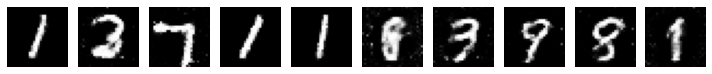

In [60]:
from keras.optimizers import Adam
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Input
from keras.models import Model
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

np.random.seed(10)
noise_dim = 100
batch_size = 16
steps_per_epoch = 3750
epochs = 20
save_dir = os.path.join(os.getcwd(), 'saved_pic')

img_rows, img_cols, channels = 28, 28, 1

optimizer = Adam(0.0002, 0.5)

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

x_train = x_train.reshape(-1, img_rows*img_cols*channels)


if not os.path.isdir(save_dir):
    os.mkdir(save_dir)


def create_generator():
    generator = Sequential()
    
    generator.add(Dense(256, input_dim=noise_dim))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(img_rows*img_cols*channels, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator


def create_discriminator():
    discriminator = Sequential()
     
    discriminator.add(Dense(1024, input_dim=img_rows*img_cols*channels))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator


def show_images(noise):
    generated_images = generator.predict(noise)
    plt.figure(figsize=(10, 10))
    
    for i, image in enumerate(generated_images):
        plt.subplot(10, 10, i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)), cmap='gray')
        else:
            plt.imshow(image.reshape((img_rows, img_cols, channels)))
        plt.axis('off')
    
    plt.tight_layout()
    
    if epoch != None:
      plt.savefig(f'{save_dir}/gan-images_epoch-{epoch}.png')

    plt.show()


discriminator = create_discriminator()
generator = create_generator()

discriminator.trainable = False

gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

static_noise = np.random.normal(0, 1, size=(10, noise_dim))

for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        fake_x = generator.predict(noise)

        real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
        
        x = np.concatenate((real_x, fake_x))

        disc_y = np.zeros(2*batch_size)
        disc_y[:batch_size] = 0.9

        d_loss = discriminator.train_on_batch(x, disc_y)

        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f'Epoch: {epoch} \t Discriminator Loss: {d_loss} \t\t Generator Loss: {g_loss}')
    
    if epoch != None:
      show_images(static_noise)









